<a href="https://colab.research.google.com/github/Kapil-Guru/artro-git/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis

In [ ]:
from sklearn.datasets import load_wine
df_wine = load_wine()
print(df_wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
X = df_wine['data']
Y = df_wine['target']
print(len(df_wine['feature_names']))
print(df_wine['data'].shape)

13
(178, 13)


In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

In [ ]:
scl.fit(X)
print(scl.mean_)
print(scl.scale_)

[1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]
[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]


In [ ]:
X_con = scl.transform(X)
print(X_con)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [ ]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components = 3)

In [ ]:
model_pca.fit(X_con)
print(model_pca.explained_variance_)
print(model_pca.explained_variance_ratio_)
X_pca = model_pca.transform(X_con)

[4.73243698 2.51108093 1.45424187]
[0.36198848 0.1920749  0.11123631]


In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(X_pca,Y,random_state=6,test_size=0.3)
print(xtr.shape)

(124, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_n = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_n.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(model_n.score(xtr,ytr))
print(model_n.score(xts,yts))

0.9758064516129032
0.9629629629629629


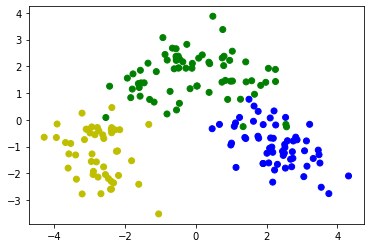

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
Y_c = pd.Series(Y).map({0:'b',1:'g',2:'y'})
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y_c)
plt.show()

##Manual calculation of pca

In [ ]:
from sklearn.datasets import load_wine
df_wine = load_wine()
print(df_wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
X = df_wine['data']
Y = df_wine['target']
print(len(df_wine['feature_names']))
print(df_wine['data'].shape)

13
(178, 13)


In [ ]:
X_mean = X.mean(axis=0)
X_mean

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [ ]:
X_std = X.std(axis=0)
print(X_std)
X_con_2 = (X-X_mean)/X_std
print(X_con_2.shape)


[8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]
(178, 13)


In [ ]:
import numpy as np
cov_m = np.cov(X_con_2.T)
print(cov_m.shape)

(13, 13)


In [ ]:
value,vectors = np.linalg.eig(cov_m)
print(value)
print(vectors)
print(type(vectors))

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 

In [ ]:
X_con_2.shape

(178, 13)

In [ ]:
vec = vectors[:,:3]
#print(vec)
val = value[:3]
X_pca_2 = X_con_2.dot(vec)

In [ ]:
X_pca_2 = X_pca_2*-1

In [ ]:
xtr_1,xts_1,ytr_1,yts_1 = train_test_split(X_pca_2,Y,random_state=6,test_size=0.3)

In [ ]:
model_n_1 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_n_1.fit(xtr_1,ytr_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(model_n_1.score(xtr_1,ytr_1))
print(model_n_1.score(xts_1,yts_1))

0.9758064516129032
0.9629629629629629


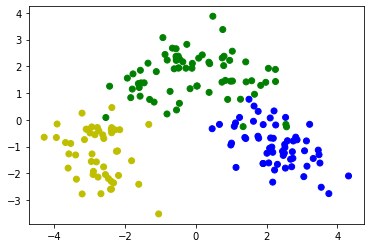

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
Y_c = pd.Series(Y).map({0:'b',1:'g',2:'y'})
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c=Y_c)
plt.show()

In [ ]:
X_p_1 = scl.transform(X[64:66].reshape(2,13))

In [ ]:
X_p = model_pca.transform(X_p_1)

In [ ]:
model_n.predict(X_p)

array([1, 1])

In [ ]:
model_n_1.predict(X_p)

array([1, 1])